<a href="https://colab.research.google.com/github/CFathurrohman/Machine_learning/blob/main/Week4/ML_W4_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**💻 Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [ ]:
# Import library
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [ ]:
# Mount Google Drive ke Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Direktori tempat penyimpanan gambar training dan test di Google Drive
train_dir = "/content/drive/MyDrive/Ml/W4/images/training/"
test_dir = "/content/drive/MyDrive/Ml/W4/images/test/"

In [ ]:
# --- LOAD DATASET ---
# Fungsi untuk memuat dataset gambar
def load_dataset(img_dir):
    p = Path(img_dir)  # Mendapatkan path direktori
    dirs = p.glob('*')  # Mendapatkan daftar folder dalam direktori

    img_list = []  # List untuk menyimpan gambar dan label

    for dir in dirs:  # Iterasi tiap folder dalam direktori
        label = str(dir).split('/')[-1]  # Mendapatkan label dari nama folder
        for file in dir.glob('*.jpg'):  # Iterasi setiap file gambar .jpg
            img = mpimg.imread(file)  # Membaca gambar
            if img is not None:  # Jika gambar ada
                img_list.append((img, label))  # Tambahkan gambar dan label ke list

    return img_list  # Mengembalikan daftar gambar dan label

In [ ]:
# Memuat data training dan testing
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

In [ ]:
# --- FUNCTION FOR VISUALIZATION ---
# Fungsi untuk menampilkan gambar acak beserta labelnya
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))  # Mendapatkan nomor acak
    img = img_list[rand_num][0]  # Mendapatkan gambar acak
    label = img_list[rand_num][1]  # Mendapatkan label dari gambar
    plt.imshow(img)  # Menampilkan gambar
    print(f'Shape\t: {img.shape}')  # Menampilkan ukuran gambar
    print(f'Label\t: {label}')  # Menampilkan label gambar


In [ ]:
# --- PREPROCESSING ---
# Fungsi untuk melakukan standarisasi input gambar
def standarized_input(image):
    # Mengubah ukuran gambar ke ukuran tetap (1100x600)
    std_img = cv2.resize(image, (1100, 600))
    return std_img

# Fungsi untuk mengubah label menjadi numerik
def label_encoder(label):
    # Encode label 'day' menjadi 1, 'night' menjadi 0
    return 1 if label == 'day' else 0

# Fungsi untuk preprocessing gambar
def preprocess(img_list):
    std_img_list = []  # List untuk menyimpan gambar yang sudah diproses
    for item in img_list:
        image = item[0]  # Ambil gambar
        label = item[1]  # Ambil label

        # Standarisasi gambar
        std_img = standarized_input(image)
        # Encode label
        img_label = label_encoder(label)
        # Tambahkan gambar dan label yang sudah diproses ke dalam list
        std_img_list.append((std_img, img_label))

    return std_img_list  # Kembalikan list gambar yang sudah diproses

In [ ]:
# Preprocess data training dan testing
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

In [ ]:
# --- HISTOGRAM FEATURE EXTRACTION ---
# Fungsi untuk mengekstrak fitur histogram dari gambar
def extract_histogram(image):
    # Mengubah gambar ke dalam colorspace HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Menghitung histogram untuk tiap channel (H, S, V)
    h_hist = cv2.calcHist([img_hsv], [0], None, [50], [0, 256])  # Histogram untuk Hue
    s_hist = cv2.calcHist([img_hsv], [1], None, [50], [0, 256])  # Histogram untuk Saturation
    v_hist = cv2.calcHist([img_hsv], [2], None, [50], [0, 256])  # Histogram untuk Value

    # Normalisasi histogram agar jumlahnya menjadi 1
    h_hist = cv2.normalize(h_hist, h_hist).flatten()
    s_hist = cv2.normalize(s_hist, s_hist).flatten()
    v_hist = cv2.normalize(v_hist, v_hist).flatten()

    # Menggabungkan ketiga histogram menjadi satu vektor fitur
    hist_features = np.concatenate([h_hist, s_hist, v_hist])

    return hist_features  # Kembalikan fitur histogram

In [ ]:
# --- FEATURE EXTRACTION FOR DATASET ---
# Fungsi untuk mengekstrak fitur dari dataset gambar
def extract_features(img_list):
    feature_list = []  # List untuk menyimpan fitur
    labels = []  # List untuk menyimpan label

    for img, label in img_list:
        # Ekstraksi fitur histogram
        hist_features = extract_histogram(img)
        # Tambahkan fitur dan label ke dalam list
        feature_list.append(hist_features)
        labels.append(label)

    return np.array(feature_list), np.array(labels)  # Kembalikan fitur dan label

In [ ]:
# Ekstraksi fitur dari data training dan testing
X_train, y_train = extract_features(train_std_img_list)
X_test, y_test = extract_features(test_std_img_list)

In [ ]:
# --- BUILDING SVM MODEL ---
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Latih model menggunakan data training
model.fit(X_train, y_train)

In [ ]:
# Train the model using training data
model.fit(X_train, y_train)

SVC()

In [ ]:
# --- EVALUATE THE MODEL ---
# Prediksi label untuk data training
y_train_pred = model.predict(X_train)

In [ ]:
# Hitung akurasi pada data training
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training data: {acc_train:.4f}')

Accuracy on training data: 1.0000


In [ ]:
# Prediksi label untuk data testing
y_test_pred = model.predict(X_test)

In [ ]:
# Hitung akurasi pada data testing
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {acc_test:.4f}')

Accuracy on test data: 0.9875


In [ ]:
# --- VISUALIZE RANDOM IMAGE AND ITS PREDICTION ---
# --- VISUALIZE RANDOM IMAGE AND ITS PREDICTION ---
# Fungsi untuk menampilkan gambar acak dan prediksinya
def random_prediction_viz(img_list, model):
    rand_num = np.random.randint(0, len(img_list))  # Mendapatkan nomor acak
    img = img_list[rand_num][0]  # Mendapatkan gambar acak
    actual_label = img_list[rand_num][1]  # Mendapatkan label asli gambar

    # Standarisasi gambar dan ekstrak fitur histogram
    std_img = standarized_input(img)
    hist_features = extract_histogram(std_img).reshape(1, -1)

    # Prediksi label gambar
    pred_label = model.predict(hist_features)[0]

    # Tampilkan gambar beserta label asli dan prediksinya
    plt.imshow(std_img)
    print(f'Actual Label: {"day" if actual_label == 1 else "night"}')
    print(f'Predicted Label: {"day" if pred_label == 1 else "night"}')

Actual Label: day
Predicted Label: day


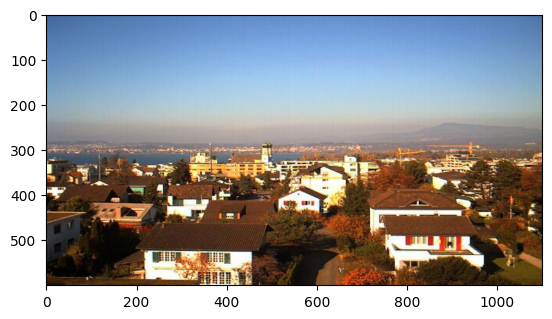

In [ ]:
# Visualisasikan prediksi acak dari data testing
random_prediction_viz(test_std_img_list, model)